In [ ]:
!pip install xee
import matplotlib.pyplot as plt
import ee
import geemap
import xarray as xr
import xee
import numpy as np
import pandas as pd
ee.Authenticate()
ee.Initialize(project = 'air-quality-466614', opt_url = 'https://earthengine-highvolume.googleapis.com')
gaul = (ee.FeatureCollection("FAO/GAUL/2015/level2")
        .filter(ee.Filter.eq('ADM0_NAME', 'Sri Lanka')))

roi = gaul.geometry()
monthly_data = ee.ImageCollection("projects/sat-io/open-datasets/GHAP/GHAP_M1K_PM25").filterDate('2017','2022')
ds = xr.open_dataset(
    monthly_data,
    engine='ee',
    crs='EPSG:4326',
    geometry=roi,
    scale=0.001
)

In [ ]:
ds_min = ds.min(dim='time')  # across time in that month
ds_max = ds.max(dim='time')

In [ ]:
ds_scaled = (ds - ds_min) / (ds_max - ds_min)

In [ ]:
ds_scaled = ds.groupby('time.month').apply(lambda x: (x - x.min('time')) / (x.max('time') - x.min('time')))

In [ ]:
monthly_mean=ds_scaled.groupby('time.month').mean('time')

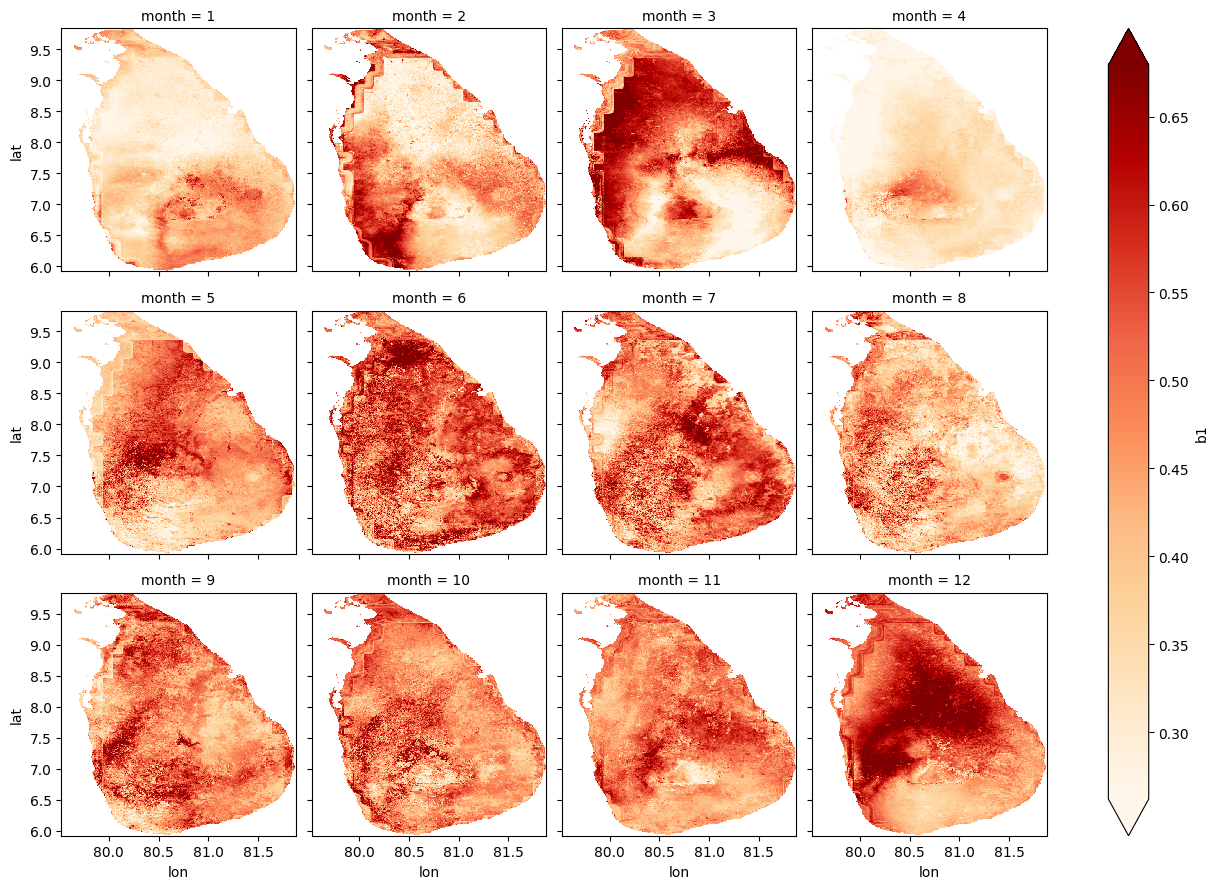

In [ ]:
monthly_mean.b1.plot(
    x="lon",
    y="lat",
    col="month",
    robust=True,
    cmap="OrRd",
    col_wrap=4
)

plt.savefig("Monthly_PM25.png", dpi=360, bbox_inches="tight")
